In [45]:
import nltk
import matplotlib
import re

from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk
from nltk.corpus import stopwords

In [ ]:
pip install praw

In [71]:
ci = "LYqbk47LwrtNMG4I0CHS8g" #your client id
cs = "-tlOZIFuRpYpv2xQt-7giAWzW0DCeA" #your client secret
ua = "u/Icy-Initiative-3973" #your user agent name
sub = "technology" #the name of the subreddit (not including the 'r/')

In [28]:
ci = "LYqbk47LwrtNMG4I0CHS8g" #your client id
cs = "-tlOZIFuRpYpv2xQt-7giAWzW0DCeA" #your client secret
ua = "u/Icy-Initiative-3973" #your user agent name
sub = "funny" #the name of the subreddit (not including the 'r/')

In [75]:
ci = "LYqbk47LwrtNMG4I0CHS8g" #your client id
cs = "-tlOZIFuRpYpv2xQt-7giAWzW0DCeA" #your client secret
ua = "u/Icy-Initiative-3973" #your user agent name
sub = "politics" #the name of the subreddit (not including the 'r/')

**Data Scraping**

In [76]:
import praw
from praw.models import MoreComments

reddit = praw.Reddit(
    client_id=ci,
    client_secret=cs,
    user_agent=ua
)

with open(sub+".txt", "w",encoding="utf-8") as f:
    
    #on the following line you can change top to any of the previously mentioned ways of sorting 
    #and the limit to however many posts you would like to extract (here we extract just 10).
    for post in reddit.subreddit(sub).top(limit=100): 
        
        #this line collects the post titles
        f.write(post.title+"\n")
        
        #this line collects the post content
        f.write(post.selftext+"\n")
        
        #this section collects the comments
        for comment in post.comments:
            if isinstance(comment, MoreComments):
                continue
            f.write(comment.body+"\n")

In [4]:
def load_txt(file):
    with open(file, encoding='utf8') as f:
        return ' '.join(line.strip() for line in f.readlines())

In [73]:
technology_txt = load_txt('technology.txt')

In [77]:
politics_txt = load_txt('politics.txt')

In [30]:
funny_txt = load_txt('funny.txt')

**Tokenising**

In [6]:
technology_tokens = nltk.word_tokenize(technology_txt)

In [20]:
politics_tokens = nltk.word_tokenize(politics_txt)

In [32]:
funny_tokens = nltk.word_tokenize(funny_txt)

**Converting to lowercase**

In [7]:
technology_lowercase = [t.lower() for t in technology_tokens]

In [22]:
politics_lowercase = [t.lower() for t in politics_tokens]

In [33]:
funny_lowercase = [t.lower() for t in funny_tokens]

**Removing punctuations**

In [8]:
technology_no_punct = [t for t in technology_lowercase if t.isalnum()]

In [23]:
politics_no_punct = [t for t in politics_lowercase if t.isalnum()]

In [34]:
funny_no_punct = [t for t in funny_lowercase if t.isalnum()]

In [33]:
print(technology_no_punct)

['reddit', 'bans', 'subreddit', 'group', 'only', 'because', 'reddit', 'is', 'being', 'mentioned', 'by', 'politicians', 'so', 'they', 'will', 'move', 'to', 'or', 'whack', 'a', 'mole', 'how', 'about', 'enabling', 'users', 'to', 'block', 'shitty', 'subreddits', 'they', 'don', 't', 'want', 'to', 'see', 'in', 'meanwhile', 'twitter', 'would', 'like', 'to', 'remind', 'its', 'users', 'that', 'advocating', 'for', 'a', 'violent', 'insurrection', 'that', 'results', 'in', 'security', 'breaches', 'injuries', 'and', 'deaths', 'will', 'result', 'in', 'a', 'temporary', 'ban', 'of', 'half', 'an', 'hour', 'starting', 'at', '3', 'am', 'on', 'a', 'saturday', 'although', 'this', 'time', 'is', 'subject', 'to', 'change', 'subject', 'to', 'if', 'twitter', 'can', 'find', 'a', 'time', 'where', 'twitter', 'usage', 'is', 'even', 'lower', 'the', 'weirdest', 'thing', 'is', 'that', 'when', 'a', 'subreddit', 'gets', 'banned', 'the', 'admins', 'usually', 'go', 'out', 'of', 'their', 'way', 'to', 'get', 'all', 'similar'

**Removing stopwords**

In [9]:
technology_no_stop = [t for t in technology_no_punct if t not in stopwords.words('english')]

In [25]:
politics_no_stop = [t for t in politics_no_punct if t not in stopwords.words('english')]

In [36]:
funny_no_stop = [t for t in funny_no_punct if t not in stopwords.words('english')]

In [12]:
#print(technology_no_stop)

['reddit', 'bans', 'subreddit', 'group', 'reddit', 'mentioned', 'politicians', 'move', 'whack', 'mole', 'enabling', 'users', 'block', 'shitty', 'subreddits', 'want', 'see', 'meanwhile', 'twitter', 'would', 'like', 'remind', 'users', 'advocating', 'violent', 'insurrection', 'results', 'security', 'breaches', 'injuries', 'deaths', 'result', 'temporary', 'ban', 'half', 'hour', 'starting', '3', 'saturday', 'although', 'time', 'subject', 'change', 'subject', 'twitter', 'find', 'time', 'twitter', 'usage', 'even', 'lower', 'weirdest', 'thing', 'subreddit', 'gets', 'banned', 'admins', 'usually', 'go', 'way', 'get', 'similar', 'ones', 'gone', 'banned', 'cth', 'remember', 'banned', 'accident', 'mind', 'fuck', 'able', 'stay', 'banning', 'lmao', 'literally', 'like', 'exact', 'thing', 'lol', 'nothing', 'congratulate', 'reddit', 'trying', 'save', 'ass', 'deleted', 'ca', 'wait', 'get', 'downvoted', 'oblivion', 'honest', 'question', 'come', 'removed', 'reddit', 'social', 'media', 'company', 'goal', 'm

**Stemming**

In [13]:
porter = nltk.PorterStemmer()
technology_stemmed = [porter.stem(w) for w in technology_no_stop]

#print(technology_stemmed)

In [26]:
porter = nltk.PorterStemmer()
politics_stemmed = [porter.stem(w) for w in politics_no_stop]



In [37]:
porter = nltk.PorterStemmer()
funny_stemmed = [porter.stem(w) for w in funny_no_stop]



**Sentiment Analysis**

In [78]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialising VADER
sid = SentimentIntensityAnalyzer()


# Analysing sentiment
sentiment_scores = sid.polarity_scores(politics_txt)

# Printing sentiment scores
print(sentiment_scores)

{'neg': 0.159, 'neu': 0.703, 'pos': 0.137, 'compound': -1.0}


In [74]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialising VADER
sid = SentimentIntensityAnalyzer()



# Analysing sentiment
sentiment_scores = sid.polarity_scores(technology_txt)

# Printing sentiment scores
print(sentiment_scores)

{'neg': 0.127, 'neu': 0.742, 'pos': 0.131, 'compound': 1.0}


**Frequency Distribution**

[('peopl', 1440), ('like', 1209), ('get', 1062), ('go', 924), ('fuck', 914), ('would', 808), ('use', 779), ('make', 778), ('one', 753), ('reddit', 694), ('want', 684), ('time', 677), ('http', 655), ('work', 632), ('net', 632), ('neutral', 629), ('compani', 612), ('need', 581), ('year', 557), ('internet', 537), ('thing', 518), ('shit', 509), ('even', 485), ('know', 472), ('think', 465), ('us', 464), ('see', 460), ('facebook', 449), ('say', 444), ('delet', 430)]


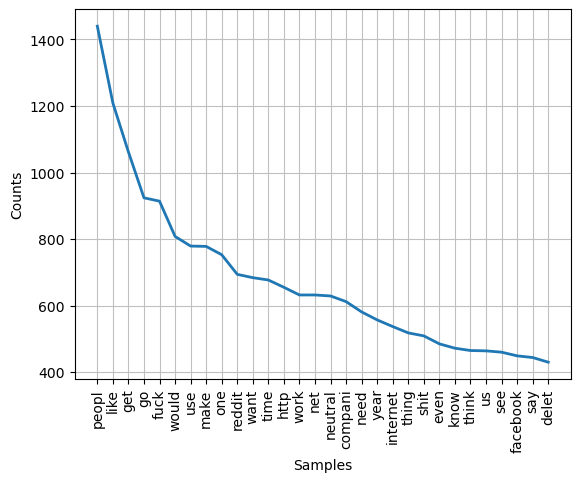

<Axes: xlabel='Samples', ylabel='Counts'>

In [40]:
fd = nltk.FreqDist(technology_stemmed)
print(fd.most_common(30))
fd.plot(30)

[('trump', 3620), ('http', 2169), ('peopl', 1743), ('vote', 1530), ('get', 1418), ('presid', 1395), ('like', 1358), ('fuck', 1315), ('would', 1205), ('go', 1075), ('biden', 1063), ('republican', 974), ('time', 947), ('one', 931), ('elect', 915), ('year', 852), ('make', 848), ('say', 821), ('impeach', 806), ('tax', 787), ('need', 781), ('us', 732), ('right', 730), ('want', 712), ('state', 711), ('even', 676), ('know', 648), ('see', 614), ('think', 606), ('good', 595)]


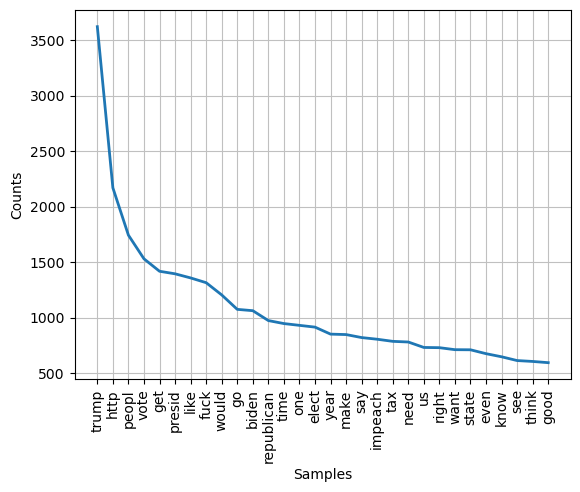

<Axes: xlabel='Samples', ylabel='Counts'>

In [39]:
fd = nltk.FreqDist(politics_stemmed)
print(fd.most_common(30))
fd.plot(30)

[('like', 1105), ('one', 790), ('get', 775), ('look', 594), ('go', 571), ('would', 536), ('time', 484), ('love', 461), ('peopl', 431), ('fuck', 419), ('got', 406), ('make', 404), ('see', 399), ('good', 383), ('thing', 381), ('guy', 374), ('http', 370), ('know', 370), ('think', 318), ('day', 314), ('year', 313), ('laugh', 300), ('kid', 299), ('realli', 297), ('work', 296), ('need', 294), ('funni', 293), ('want', 292), ('well', 287), ('back', 283)]


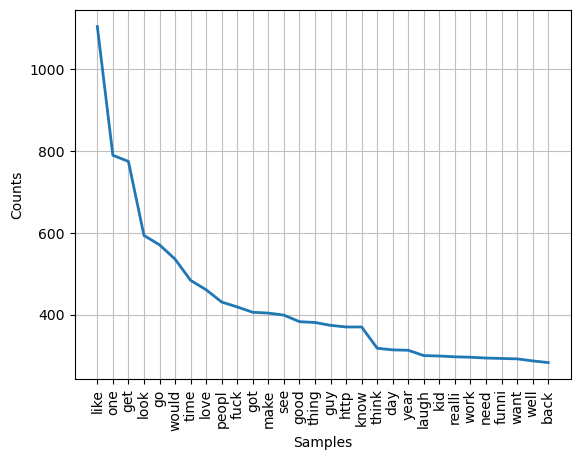

<Axes: xlabel='Samples', ylabel='Counts'>

In [41]:
fd = nltk.FreqDist(funny_stemmed)
print(fd.most_common(30))
fd.plot(30)

**Collocations**

In [47]:
nltk.Text(technology_tokens).collocations()

net neutrality; Net Neutrality; social media; Ajit Pai; free speech;
years ago; John Oliver; feel like; Aimee Challenor; White House; Elon
Musk; United States; third party; party apps; natural gas; solar
panels; Bill Gates; streaming services; last year; wind turbines


In [49]:
nltk.Text(politics_tokens).collocations()

Donald Trump; Joe Biden; United States; Personal insults; White House;
performed automatically; troll accusations; outlet criteria; rule
violations; approved domains; civil discussion; media outlets; Supreme
Court; domains list; insider trading; permanent ban; wishing
death/physical; questions regarding; death/physical harm; please click


In [50]:
nltk.Text(funny_tokens).collocations()

looks like; ever seen; social media; performed automatically; front
page; years ago; friendly reminder; 've seen; expressly forbidden;
toilet paper; Well done; Rule-breaking posts; 've ever; best thing;
TikTok videos; Looks like; going places; may result; look like; Holy
shit


**Common Words**

In [51]:
technology=set(technology_tokens)
politics= set(politics_tokens)
fun=set(funny_tokens)

In [57]:
common_words = technology.intersection(politics, fun)

#print("Common Words:", common_words)

In [60]:
common_lowercase = [t.lower() for t in common_words]

In [61]:
common_no_punct = [t for t in common_lowercase if t.isalnum()]

In [62]:
common_no_stop = [t for t in common_no_punct if t not in stopwords.words('english')]

In [68]:
fd = nltk.FreqDist(common_no_stop)
print(fd.most_common(10))


[('ok', 3), ('new', 3), ('let', 3), ('sure', 3), ('show', 3), ('sad', 3), ('even', 3), ('still', 3), ('get', 3), ('first', 3)]
